In [1]:
import cv2
import numpy as np
from pathlib import Path
from PIL import Image

import sys; sys.path.append('..')
from continuous_landmarks.dataset.transforms import (
    ComposeWithPoints, AlignImageWithPoints, ResizeWithPoints
)
from continuous_landmarks.dataset.face300w import Face300WDataset, get_eyes_mouth_300w

In [2]:
def draw_points(im, points):
    im_arr = np.array(im)

    for p in points:
        cv2.circle(im_arr, p.astype(int), 3, (0, 255, 255), -1)

    return Image.fromarray(im_arr)

In [3]:
tfm = ComposeWithPoints([
    AlignImageWithPoints(get_eyes_mouth_300w),
    ResizeWithPoints(224),
])

data_path = Path('../data/300W/')

ds = Face300WDataset(data_path, tfm)

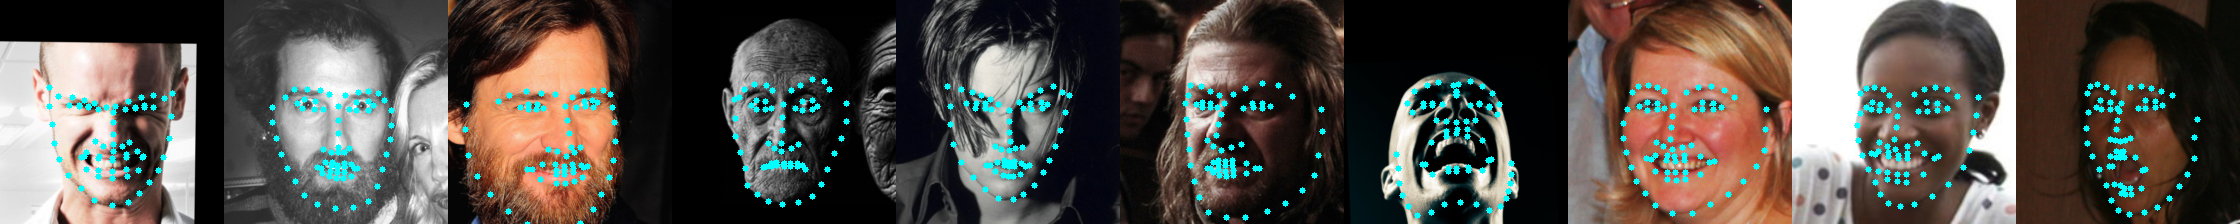

In [4]:
Image.fromarray(np.hstack([draw_points(*ds[i]) for i in range(10)]))